# loading  the white wine and red wine datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np

print("hellow world")

hellow world


In [3]:

# Load the red wine data
red_wine = pd.read_csv('../../data/wine/red.csv')

# Load the white wine data
white_wine = pd.read_csv('../../data/wine/white.csv')


In [5]:
# Add a new column to indicate wine color
red_wine['color'] = 0  # 0 for red wine
white_wine['color'] = 1  # 1 for white wine

# Concatenate the two datasets
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Handle missing values by replacing them with the mean of their respective columns
wine_data.fillna(wine_data.mean(), inplace=True)  # Added step to handle NaN values



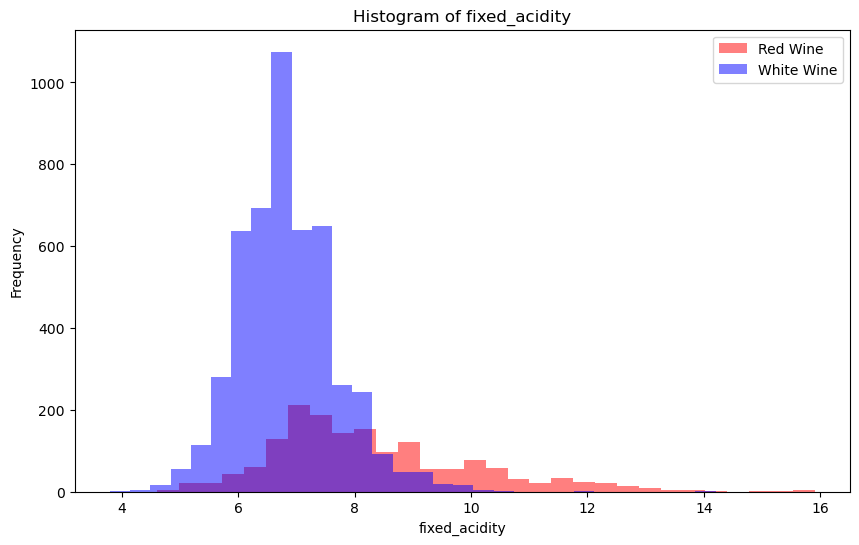

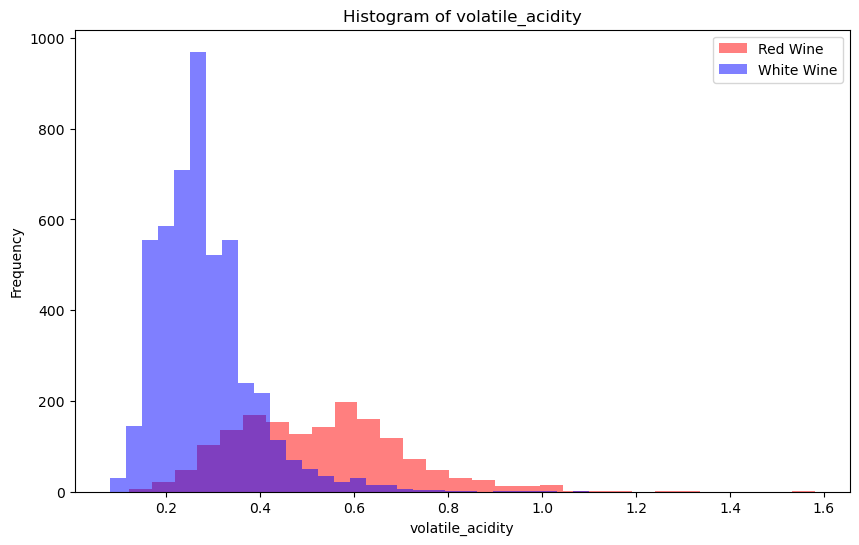

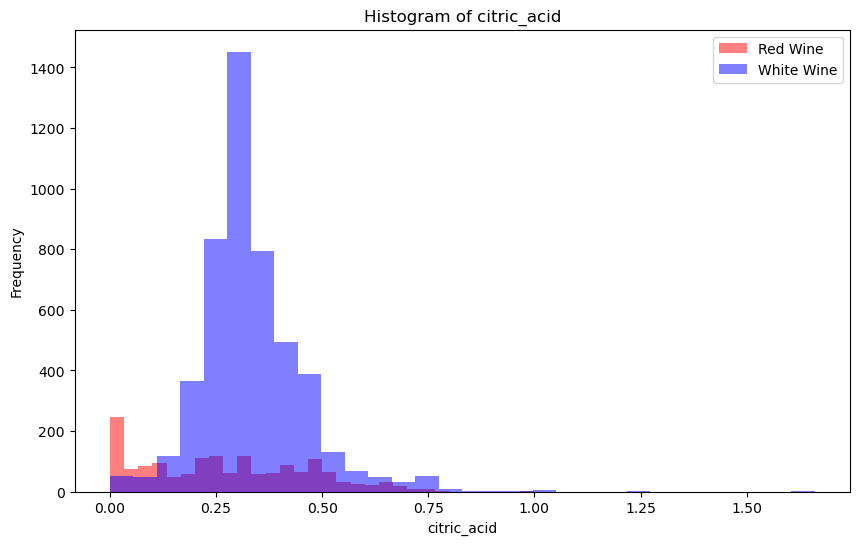

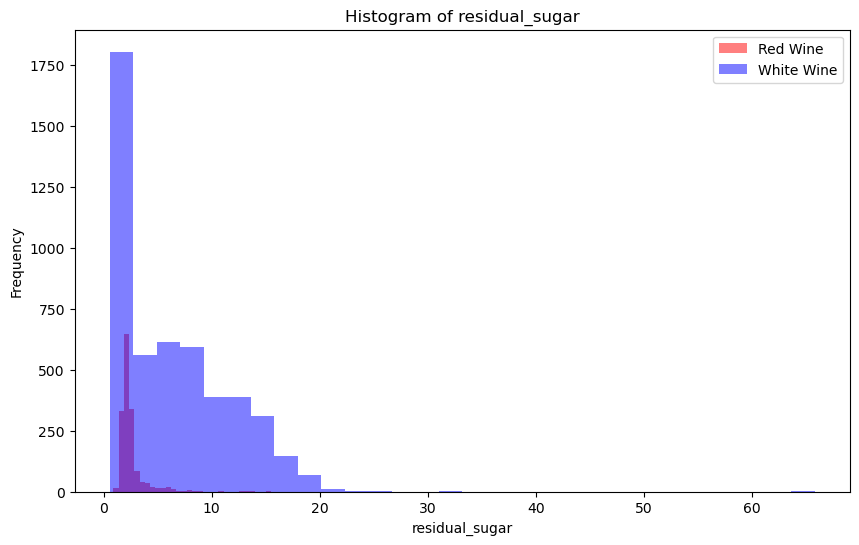

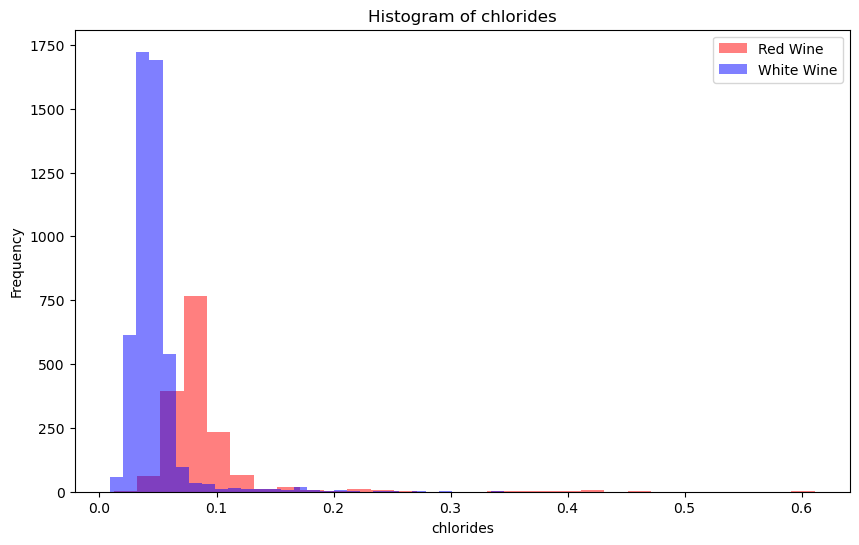

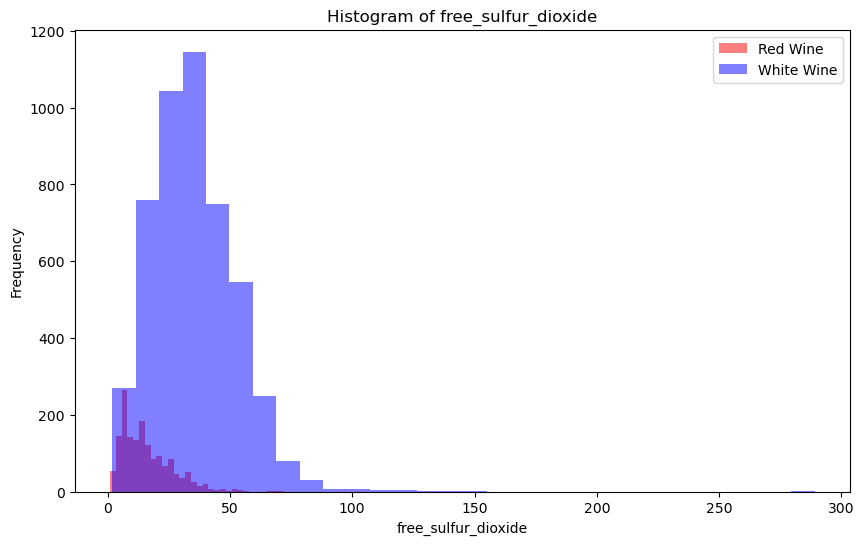

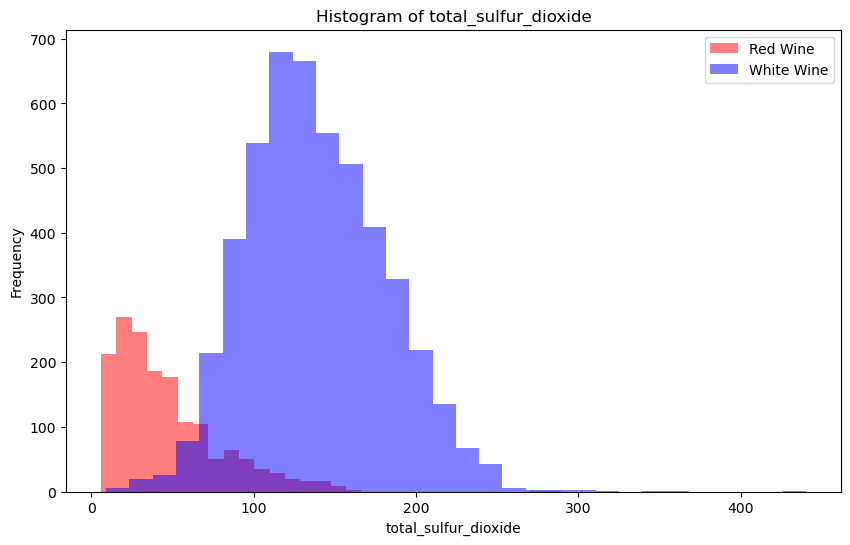

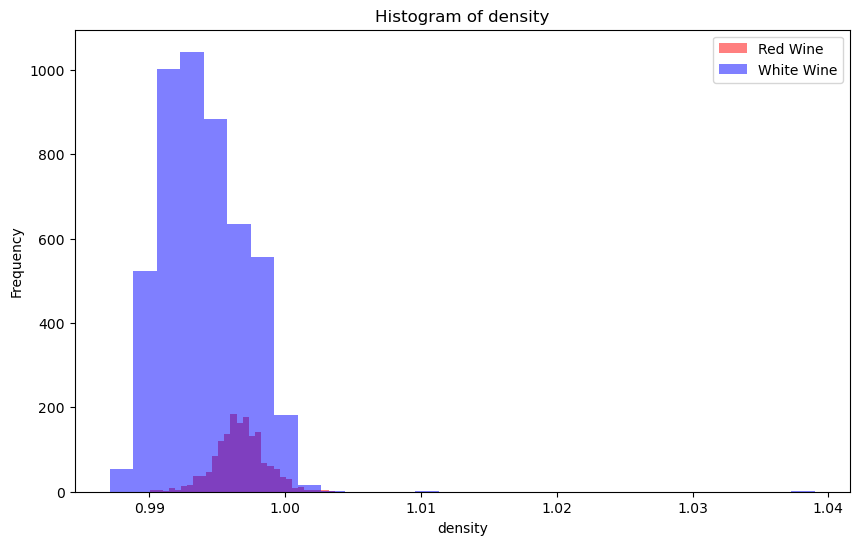

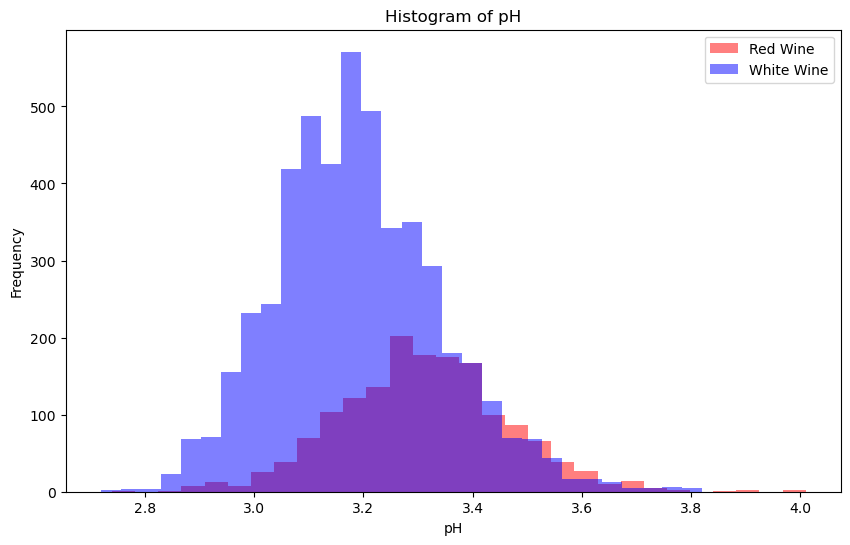

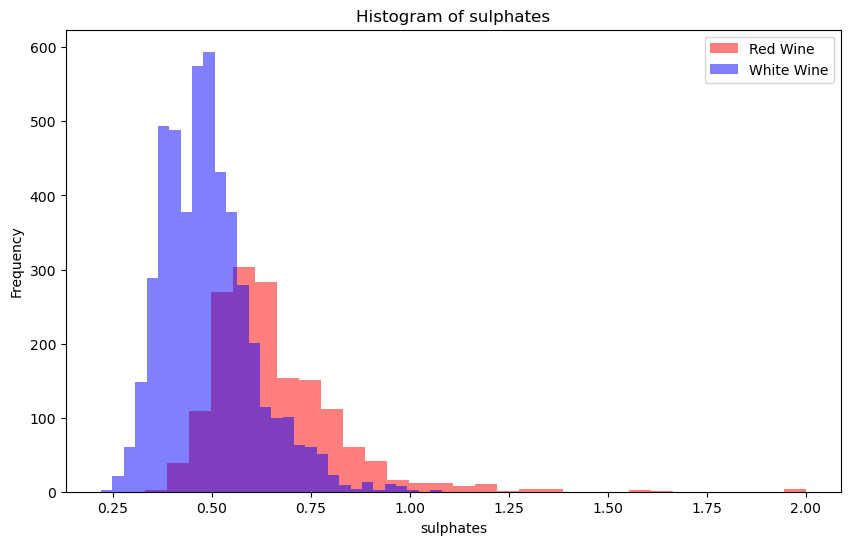

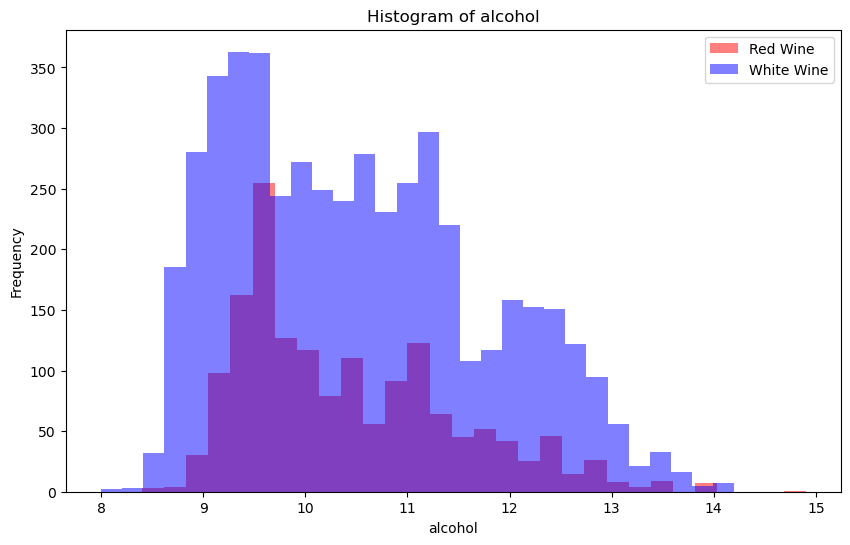

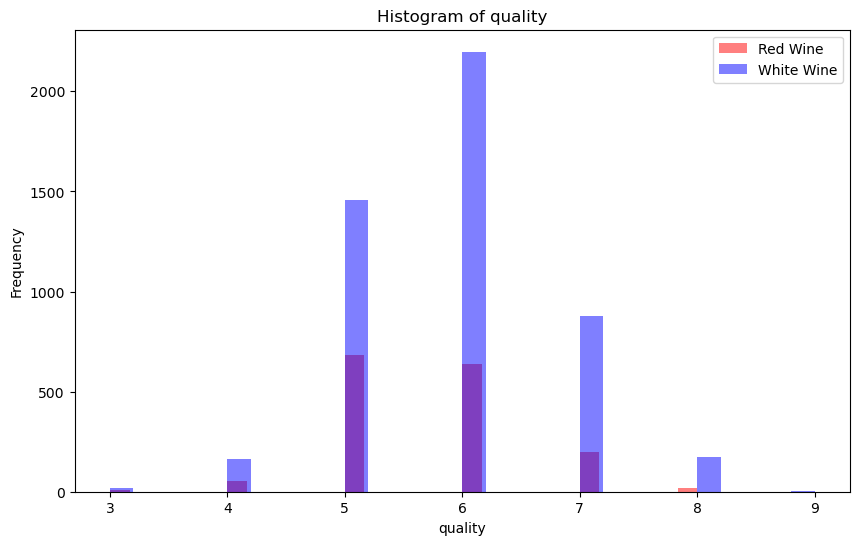

In [6]:
# Iterate over each column (excluding 'color') to plot histograms
for column in wine_data.columns:
    if column != 'color':  # Skip the 'color' column
        plt.figure(figsize=(10, 6))
        
        # Plot the histogram for red wine
        red_wine[column].plot(kind='hist', bins=30, alpha=0.5, color='red', label='Red Wine')
        
        # Plot the histogram for white wine
        white_wine[column].plot(kind='hist', bins=30, alpha=0.5, color='blue', label='White Wine')
        
        # Add labels, title, and legend
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        
        # Save the plot as a PNG file
        plt.savefig(f'{column}_histogram.png')
        
        # Display the plot
        #plt.show()  #uncomment to see histograms here

In [7]:
# Define the target column (either 'color' for binary classification or 'quality' for multi-class)
target_column = 'quality'  # Change to 'quality' for multi-class classification

# Separate features (X) and target (y)
X = wine_data.drop(columns=['color', 'quality'])
y = wine_data[target_column]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display dataset information
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Target column: {target_column}")

Training data shape: (5197, 11)
Testing data shape: (1300, 11)
Target column: quality


In [8]:

# Create and train the neural network classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.56
Precision: 0.56
Recall: 0.56

Confusion Matrix:
[[  1   0   1   4   0   0   0]
 [  1   2  30  10   0   0   0]
 [  0   3 265 126   8   0   0]
 [  0   2 166 371  58   0   0]
 [  0   0   7 126  82   0   0]
 [  0   0   0  17  18   1   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.50      0.17      0.25         6
           4       0.29      0.05      0.08        43
           5       0.57      0.66      0.61       402
           6       0.57      0.62      0.59       597
           7       0.49      0.38      0.43       215
           8       1.00      0.03      0.05        36
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.49      0.27      0.29      1300
weighted avg       0.56      0.56      0.54      1300



/opt/anaconda3/envs/gaif/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
# Display neural network information
print("\nNeural Network Details:")
print(f"Number of layers: {mlp.n_layers_}")
print(f"Number of outputs: {mlp.n_outputs_}")
print(f"Hidden layer sizes: {mlp.hidden_layer_sizes}")
print(f"Number of iterations completed: {mlp.n_iter_}")
print(f"Loss after training: {mlp.loss_:.4f}")
print(f"Convergence status: {'Converged' if mlp.n_iter_ < mlp.max_iter else 'Not converged'}")


Neural Network Details:
Number of layers: 3
Number of outputs: 7
Hidden layer sizes: (100,)
Number of iterations completed: 300
Loss after training: 0.8498
Convergence status: Not converged
